In [1]:
import sqlite3
import json

import pandas as pd
import numpy as np
import matplotlib

In [2]:
con = sqlite3.connect("meter.db")
cur = con.cursor()

In [3]:
data = []

sql = """
SELECT predictions.ida, predictions.idb, predictions.scores, ground_truth.label
FROM predictions
INNER JOIN ground_truth
ON predictions.ida = ground_truth.ida AND predictions.idb = ground_truth.idb
"""

for sid, tid, scores, label in cur.execute(sql).fetchall():
    data.append(
        {
            "sid": sid,
            "tid": tid,
            "scores": list(json.loads(scores).values()),
            "label_multi": label,
            "label_binary": 0 if label == "nd" else 1,
        }
    )

df = pd.DataFrame(data)
df

,sid,tid,scores,label_multi,label_binary
0,0,0,"[0.7007299270072993, 0.2376237623762376, 0.106...",pd,1
1,0,1,"[0.7352941176470589, 0.265, 0.1670702179176755...",pd,1
2,1,2,"[0.7486033519553073, 0.13573407202216067, 0.02...",pd,1
3,1,3,"[0.8385416666666666, 0.3052109181141439, 0.160...",pd,1
4,1,4,"[0.7857142857142857, 0.14960629921259844, 0.03...",pd,1
...,...,...,...,...,...
939,264,939,"[0.6595238095238095, 0.13994685562444642, 0.03...",nd,0
940,264,940,"[0.5714285714285714, 0.072, 0.0092226613965744...",nd,0
941,264,941,"[0.6113207547169811, 0.16310679611650486, 0.05...",nd,0
942,264,942,"[0.7846153846153846, 0.29411764705882354, 0.14...",pd,1


In [4]:
df[["s0", "s1", "s2", "s3"]] = pd.DataFrame(df.scores.tolist())
df


,sid,tid,scores,label_multi,label_binary,s0,s1,s2,s3
0,0,0,"[0.7007299270072993, 0.2376237623762376, 0.106...",pd,1,0.700730,0.237624,0.106452,0.355556
1,0,1,"[0.7352941176470589, 0.265, 0.1670702179176755...",pd,1,0.735294,0.265000,0.167070,0.418182
2,1,2,"[0.7486033519553073, 0.13573407202216067, 0.02...",pd,1,0.748603,0.135734,0.024259,0.085271
3,1,3,"[0.8385416666666666, 0.3052109181141439, 0.160...",pd,1,0.838542,0.305211,0.160194,0.147059
4,1,4,"[0.7857142857142857, 0.14960629921259844, 0.03...",pd,1,0.785714,0.149606,0.033766,0.147887
...,...,...,...,...,...,...,...,...,...
939,264,939,"[0.6595238095238095, 0.13994685562444642, 0.03...",nd,0,0.659524,0.139947,0.030664,0.201439
940,264,940,"[0.5714285714285714, 0.072, 0.0092226613965744...",nd,0,0.571429,0.072000,0.009223,0.213992
941,264,941,"[0.6113207547169811, 0.16310679611650486, 0.05...",nd,0,0.611321,0.163107,0.059501,0.225490
942,264,942,"[0.7846153846153846, 0.29411764705882354, 0.14...",pd,1,0.784615,0.294118,0.148649,0.225434


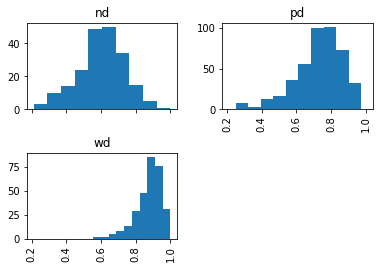

In [5]:
hist0 = df.hist(column="s0", by="label_multi", sharex="True")

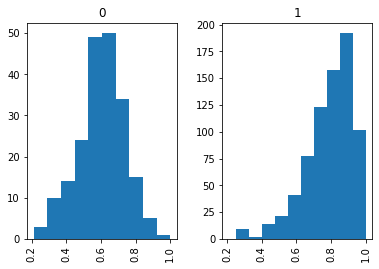

In [6]:
hist0bin = df.hist(column="s0", by="label_binary", sharex="True")

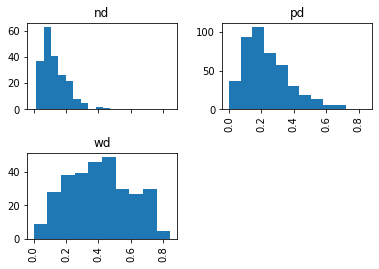

In [7]:
hist1 = df.hist(column="s1", by="label_multi", sharex="True")

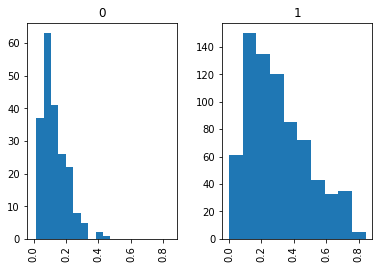

In [8]:
hist1bin = df.hist(column="s1", by="label_binary", sharex="True")

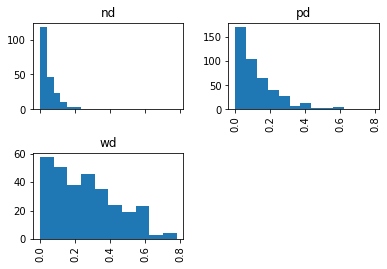

In [9]:
hist2 = df.hist(column="s2", by="label_multi", sharex="True")

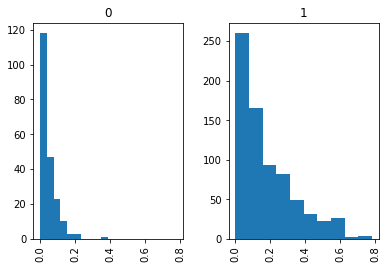

In [10]:
hist2bin = df.hist(column="s2", by="label_binary", sharex="True")

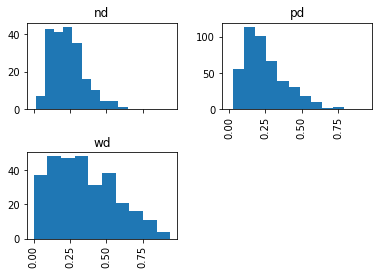

In [11]:
hist3 = df.hist(column="s3", by="label_multi", sharex="True")

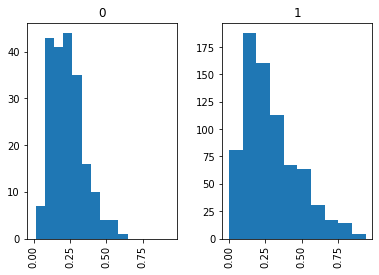

In [12]:
hist3bin = df.hist(column="s3", by="label_binary", sharex="True")

In [18]:
import plotly.express as px

fig = px.box(df, y="s0", color="label_binary", title="unigram containment")
fig.show()

In [19]:
fig = px.box(df, y="s1", color="label_binary", title="trigram containment")
fig.show()

In [20]:
fig = px.box(df, y="s2", color="label_binary", title="5gram containment")
fig.show()

In [21]:
fig = px.box(df, y="s3", color="label_binary", title="hapax containment")
fig.show()